# Capstone 1: Collaborative Filtering Based Book Recommendation Engine

# Project Summary

## Introduction

Recommendation engines have laid the foundation of every major tech company around us that provides retail, video-on-demand or music streaming service and thus redefined the way we shop, search for an old friend, find new music or places to go to. From finding the best product in the market to searching for an old friend online or listening to songs while driving, recommender systems are everywhere. A recommender system helps to filter vast amount of information from all users and item database to individual’s preference. For example, Amazon uses it to suggest products to customers, and Spotify uses it to decide which song to play next for a user. 
Book reading apps like Goodreads has personally helped me to find books I couldn’t put away and thus getting back to the habit of reading regularly again. While a lot of datasets for movies (Netflix, Movielens) or songs have been explored previously to understand how recommendation engine works for those applications and what are the scopes of future improvement, book recommendation engines have been relatively less explored.
The primary goal of this project is to develop a collaborative book recommendation model using good#reads dataset that can suggest readers what books to read next. Additionally, data wrangling and exploratory data analysis will be utilized to draw insights about users reading preferences (e.g. how they like to tag, what ratings they usually provide etc.) and current trends in the book market (book categories that are in demand, successful authors in the market etc.).

## Key Busieness Insights

> **Understanding User Behavior**

- When the tag counts of different generalized tag_names were ranked, the top 10 tag name shows that users prefer to have separate shelves for books they marked as favorite, read in a particular year (e.g. read in 1990, Childhood Books), owned or borrowed from library, read in a different format (e.g. ebook\ audiobook). The other shelving preferance per the top 10 tag_names were different book categories such as 'Fiction', 'Young - Adult' etc.

- The count plot of user provided ratings shows that users are more likely to rate a book 4 or higher. As the tag counts for books they mark as favorite is also higher (shown previosuly), it seems that users are more likely to rate and store a book when they like it. 

- Users use a wide variety of names even if they are tagging a book in the same category. Foe example Science Fiction and Fantasy 

> **Factors to Consider for a Book's Rating**

- EDA shows that the top 15 books per tag_count as reader's favorite is not same as the top 15 books ranked per ratings of the users. Also, while the average rating counts for the top 15 books marked as the reader's favorite is significantly higher (2191465) than the average ratings received by all books (23833), the avaerage rating counts (18198) for the top 15 books is below the average. Both favorite and top rated 15 books have higher average ratings (4.26 and 4.74 respectively compared to the average ratings of all books (4.01). These statistics suggest that only considering the average rating is not enough to rank books for recommendation. An an ideal metric should also consider how many times the book has been marked as favorite and the total number of ratings it received in addition to the average rating of the book.

- 9 of the top 15 favorite books are most frequently tagged in the Young - Adult Category.The other popular categories in the top 15 favorite books are science fiction and fantasy, romance, historical fiction or fiction in general. The harry potter books (ranked 2,3,4,6,7) have also been freqently tagged as children/childhood books. A quick look at the publication date of these books reveal that most of the books under Young Adult and Childhood categories were actually publsihed at least 10 years ago. Therefore, they were probably the favorite books of many adult readers when they were young. This highlights that the year of publication and dates of ratings can also impact a book's ranking and should be factored into the performance metric. To be able to determine if the books are equally liked by current generation of young readers, one can check if the average number of positive ratings recevied by a book per year has reduced or increased since its year of publication. As the datasets used in this project do not provide the dates when the books were rated, it was not possible to implement this scheme into the recommendation framework. 

> **Book Categories**

- Based on the tag_counts of different book categories, it was found that 'Fiction' dominates as the popular category for users of all age groups (i.e. Adult and Young Adult readers). Beside fiction in general, tags related to 'Science Fiction and Fantasy' seems to be used more frequently than other categories in both adult and young adult section. Some other popular categories are Crime & Mysetery, Historical Fiction etc. Based on the findings, it seems that the demand for different kinds of fiction are higher than books based on actual events/facts (i.e. History or Science) in the market. The market seems to agree with these conclusions as about 43% of the books in the dataset are found to be Fiction, with Non - Fiction (20.5%), Young Adult (8.3%) and Science Fiction and Fantasy (5.73%) as other prevailing categories. 

- Does this finding indicate that a new Fiction has higher chances of getting a good rating than new history book? The answer is probably negative. When average ratings of different book categories were compared, it was found that readers do not have a bias towards rating a particular category higher than the others. The average rating in every category is close to the average rating of all the books (4.01) and mostly range from 3.25 to 4.75. Higher variability exists in the ratings of categories that have more books in the market than other categories. 

> **Authors in Demand**

- JK Rowling seems to be everyone's most favorite author with 4 of her books in the the 15 Favorite books. However, when authors were ranked per the number of books they wrote and the average ratings their books received, JK Rowling did not make it to the top 10. Stephen King seems to be the most successful authors with 44 books in the market with an average rating of 3.9. Other succesful authors considering both ratings and number of books are Dean Koontz, John Grisham, Nora Roberts and Jodi Picoult. This suggests that an ideal metric to evaluate an author's demand in the market should include the number of books an author wrote, the ratings the books received, the number of books that has been marked as favorite, and the tag counts as favorite for each book.

> **Rating Counts per Book and Per User**

- All the users in the dataset have rated at least 19 books where the most active users rated 200 books. 80% of the users rated at least 100 books
- All the books in the dataset received at least 8 ratings. When books were ramked by rating_counts, it seems that the top 10 books recived more than 10,000 ratings. CDF plot of the ratings per book showed that only ~20% of the book received more than 5000 ratings.
- As the number of books in the dataset 10000 are less than the number of users (53,424), sparsity is less likely to be an issue for ML modeling with this dataset.

# ML Modeling: Outline


The three collaborative model based algorthms we are going to use in this step are

- KNN (Memory Based Approach)
- SVD 
- Non Negative Matrix Factorication 



# Import Packages

In [1]:
from surprise import NormalPredictor
from surprise import KNNWithMeans
from surprise import NMF,SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
import matplotlib.pyplot as plt

# Import and Inspect Data

In [2]:
r = pd.read_csv('ratings_filtered_data.csv')
r=r.drop( 'Unnamed: 0',axis=1);
r.shape
n_users = len(list(set(r.user_id)))
n_books = len(list(set(r.book_id)))
print('number of users', n_users)
print('number of books', n_books)


number of users 52541
number of books 152


As number of users >> number of books sparsity should not be a problem for modeling with this dataset.

# Selection of Datasize for Modeling

As the first step for modeling, lets investigate if we can consider a subset of the available rating dataset to be able to perform all the modeling. This can be explored by increasing number of obversations considered in the dataset at small increments, and then estimating the efficieny of modeling with the increase of the size of the dataset. We will use a simple memory based algorithm (available as KNNWithMeans with the sklearn SURPRISE pakacage) for this step. 

In [3]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))


rmse = [] # Initiate an empty list to store RMSE for every iteration
size_considered = [] # Initiate an empty list to store datasize for every iteration

for i in range (1,25):
    r_selected = r[:i*10000]
    size_considered.append(i*10000)
    
# prepare a dataset object for processing with surprise package .
    data_set = Dataset.load_from_df(r_selected,reader)

#Split into test and train
    train_set, test_set = train_test_split(data_set,test_size =0.2)
# User based collaborative filtering
    knn = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn.fit(train_set)
    knn_pred = knn.test(test_set) # predict ratings for the testset
    rmse.append(accuracy.rmse(knn_pred)) # compute RMSE score


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9520
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8948
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8857
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8677
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8934
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8796
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8833
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Text(0.5,1,'Effect of Datasize on Modeling Accuracy (RMSE)')

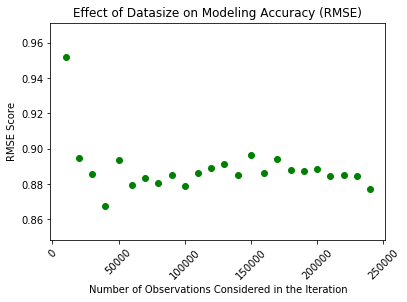

In [29]:
plt.scatter(x = size_considered,y = rmse, color = 'g')
plt.xlabel('Number of Observations Considered in the Iteration')
plt.ylabel('RMSE Score')
plt.xticks(rotation = 45)
plt.title('Effect of Datasize on Modeling Accuracy (RMSE)')

## Observation

Since there is not siginificant imporvement of the RMSE with the increase in datasize for modeling, and we can extrapolate that model performance will be similar for predicting large amount of data, and consider the  first 100,000 data for modeling. Lets redefine the dataset with 100,000 observation for all the next steps in modeling.

In [5]:
# Dataset for Rest of the Modeling Steps

In [6]:
# A reader is needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

#Select Dataset with 100,000 observation
r_select = r[:100000]
# Prepare the dataset for processing with surprise package
data_set = Dataset.load_from_df(r_select,reader)

#Split into test and train
train_set, test_set = train_test_split(data_set,test_size =0.2)


# Lets Redo KNNwithMean (this time with 100,000 dataset and crossvalidation)

In [7]:
# knn was previosuly defined as below 
knn = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
# Run 3-fold cross-validation and print results.
knn_cv = cross_validate(knn, data_set, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8910  0.9018  0.8946  0.8958  0.0045  
MAE (testset)     0.6889  0.6994  0.6917  0.6933  0.0044  
Fit time          15.51   15.89   15.15   15.51   0.30    
Test time         21.57   22.44   20.17   21.39   0.94    


In [8]:
# Store the data in a dictionary to make a final summary at the end
Model_Summary = {}
Model_Summary ['Model_Name'] = ['KNNWithMeans']
Model_Summary ['GridSearch (Y/N)']  = ['N']
Model_Summary ['Paramters']  = ['k=50, name: pearson_baseline, user_based: True,min_support = 1}']
Model_Summary ['RMSE']  = [knn_cv['test_rmse'].mean()]

# How Does KNN compares to Baseline ML Model ?

In [9]:
# Lets Define a BaseLine Model with Surprise 
nd =  NormalPredictor()

# Run 3-fold cross-validation and print results.
nd_cv = cross_validate(nd, data_set, measures=['RMSE', 'MAE'], cv=3, verbose=True)


Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3368  1.3346  1.3452  1.3389  0.0046  
MAE (testset)     1.0594  1.0564  1.0668  1.0609  0.0044  
Fit time          0.08    0.10    0.12    0.10    0.01    
Test time         0.28    0.17    0.23    0.23    0.05    


In [10]:
# Store the data in a dictionary to make a final summary at the end

Model_Summary ['Model_Name'].append('Normal Predictor')
Model_Summary ['GridSearch (Y/N)'].append('N')
Model_Summary ['Paramters'].append('-')
Model_Summary ['RMSE'].append(nd_cv['test_rmse'].mean())

## Grid Search for KNN

In [11]:
# define all parameter options
k = [30,40,50]
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {'k':k, "sim_options": sim_options}

gs_knn = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs_knn.fit(data_set)

print(gs_knn.best_score["rmse"])
print(gs_knn.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [12]:
Model_Summary ['Model_Name'].append('KNNWithMeans')
Model_Summary ['GridSearch (Y/N)'].append('Y')
Model_Summary ['Paramters'].append(gs_knn.best_params["rmse"])
Model_Summary ['RMSE'].append(gs_knn.best_score["rmse"])

# SVD for Matrix Factorization

In [13]:
%%time
# simple SVD model
svd = SVD(n_factors=20, n_epochs = 30, biased=False) # initiate a SVD algorithm object

# Run 3-fold cross-validation and print results.
svd_cv = cross_validate(svd, data_set, measures=['RMSE', 'MAE'], cv=3)

Wall time: 18.8 s


In [14]:
Model_Summary ['Model_Name'].append('SVD')
Model_Summary ['GridSearch (Y/N)'].append('N')
Model_Summary ['Paramters'].append('n_factors=20, n_epochs = 30, biased=False')
Model_Summary ['RMSE'].append(svd_cv['test_rmse'].mean())

## Grid Search for SVD

In [15]:
# parameter optimization with scikit-surprise SVD algorithm with bias

# cross validation to optimize parameters of SVD with bias
param_grid = {'n_factors': [10,20,30,50], 'n_epochs': [50,100,200], 'lr_all': [0.005],'reg_all': [0.05], 'biased': [True]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv = 3)
gs_svd.fit(data_set) # gridsesarch optimization on the trainset

# best RMSE score
print(gs_svd.best_score)
# combination of parameters that gave the best RMSE score
print(gs_svd.best_params)

{'rmse': 0.8888733257387672}
{'rmse': {'n_factors': 50, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.05, 'biased': True}}


In [16]:
Model_Summary ['Model_Name'].append('SVD')
Model_Summary ['GridSearch (Y/N)'].append('Y')
Model_Summary ['Paramters'].append(gs_svd.best_params)
Model_Summary ['RMSE'].append(gs_svd.best_score['rmse'])

In [17]:
gs_svd.best_score

{'rmse': 0.8888733257387672}

# NMF

In [18]:
%%time
# simple SVD model
nmf = NMF(n_factors=20, n_epochs = 30, biased = True) # initiate a SVD algorithm object
# Run 3-fold cross-validation and print results.
nmf_cv = cross_validate(nmf, data_set, measures=['RMSE', 'MAE'], cv=3)

Wall time: 22.8 s


In [19]:
Model_Summary ['Model_Name'].append(' NMF')
Model_Summary ['GridSearch (Y/N)'].append ('N')
Model_Summary ['Paramters'].append('n_factors=20, n_epochs = 30, biased = True')
Model_Summary ['RMSE'].append(nmf_cv['test_rmse'].mean())

# Grid Search with NMF

In [20]:
from surprise import NMF
# cross validation to optimize parameters of NMF with no bias
param_grid = {'n_factors': [10,20,30,50], 'n_epochs': [20, 30,40,50],'biased': [False, True]}
gs_nmf = GridSearchCV(NMF, param_grid, measures=['rmse'], cv=3)
gs_nmf.fit(data_set) # gridsesarch optimization on the trainset, need to feed in a Dataset object not a trainset object

# best RMSE score
print(gs_nmf.best_score)
# combination of parameters that gave the best RMSE score
print(gs_nmf.best_params)

{'rmse': 0.9152689597933327}
{'rmse': {'n_factors': 10, 'n_epochs': 40, 'biased': True}}


In [21]:
Model_Summary ['Model_Name'].append('NMF')
Model_Summary ['GridSearch (Y/N)'].append('Y')
Model_Summary ['Paramters'].append(gs_nmf.best_params["rmse"])
Model_Summary ['RMSE'].append(gs_nmf.best_score["rmse"])

In [30]:
# update settings to display untruncated dataframe
pd.set_option('display.max_colwidth', -1)

# Show Modeling Summary
CF_Modeling_Summary = pd.DataFrame.from_dict(Model_Summary)
CF_Modeling_Summary.sort_values(by = 'RMSE')

,Model_Name,GridSearch (Y/N),Paramters,RMSE
4,SVD,Y,"{'rmse': {'n_factors': 50, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.05, 'biased': True}}",0.888873
0,KNNWithMeans,N,"k=50, name: pearson_baseline, user_based: True,min_support = 1}",0.895775
2,KNNWithMeans,Y,"{'k': 50, 'sim_options': {'name': 'msd', 'min_support': 3, 'user_based': True}}",0.909761
6,NMF,Y,"{'n_factors': 10, 'n_epochs': 40, 'biased': True}",0.915269
3,SVD,N,"n_factors=20, n_epochs = 30, biased=False",0.920035
5,NMF,N,"n_factors=20, n_epochs = 30, biased = True",1.299336
1,Normal Predictor,N,-,1.338852


# Lets apply the best performing model on unseen data and compare results 

In [23]:
# Lets predict on another set of  data with best performing model 
hold_data = r[100000:200000]

# A reader is needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# Prepare the dataset for processing with surprise package
data_set = Dataset.load_from_df(hold_data,reader)

#Split the data to train and test
train , test = train_test_split(data_set, test_size = 0.5)


# define SVD model with best paramters 
svd = SVD(n_factors = 30, n_epochs = 50, lr_all =  0.005, reg_all = 0.05, biased = True)
svd.fit(train)
test_pred = svd.test(test)
accuracy.rmse(test_pred)

RMSE: 0.9392


0.9391948081640509

# Round up Predictions and compare  Histograms

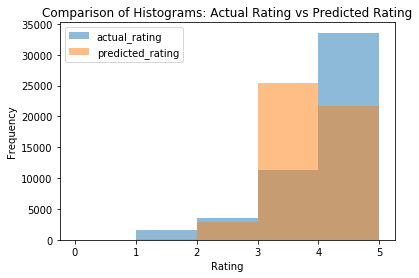

In [24]:
comparison = []
actual_rating = []

for user, item, rating in test:
    actual_rating.append(rating)
    
#plt.hist(actual_rating, color = 'g')


for item in test_pred:
    comparison.append((item[3]))
#plt.hist(comparison,color = 'b')


dataset = pd.DataFrame()
dataset ['actual_rating'] =actual_rating
dataset ['predicted_rating'] = (comparison)
dataset [['actual_rating','predicted_rating']].plot(kind='hist',bins=[0, 1, 2, 3, 4, 5], alpha=0.5) 
plt.xlabel('Rating')
plt.title('Comparison of Histograms: Actual Rating vs Predicted Rating')
plt.show()

In [25]:
#Converting Prediction Results to a DataFrame 
test_pred

[Prediction(uid=3490, iid=56, r_ui=3.0, est=3.0187496537667853, details={'was_impossible': False}),
 Prediction(uid=10158, iid=43, r_ui=5.0, est=4.617538417964529, details={'was_impossible': False}),
 Prediction(uid=10258, iid=38, r_ui=2.0, est=3.578816242039128, details={'was_impossible': False}),
 Prediction(uid=10375, iid=97, r_ui=3.0, est=3.856323848901244, details={'was_impossible': False}),
 Prediction(uid=2702, iid=49, r_ui=2.0, est=2.656618081570117, details={'was_impossible': False}),
 Prediction(uid=8463, iid=27, r_ui=5.0, est=4.57520923753581, details={'was_impossible': False}),
 Prediction(uid=1126, iid=179, r_ui=4.0, est=3.778984312548482, details={'was_impossible': False}),
 Prediction(uid=2174, iid=116, r_ui=4.0, est=4.4782787780082876, details={'was_impossible': False}),
 Prediction(uid=11978, iid=25, r_ui=4.0, est=4.4479082310537335, details={'was_impossible': False}),
 Prediction(uid=8370, iid=28, r_ui=4.0, est=3.1744233301642373, details={'was_impossible': False}),
 

# Convert the Prediction Results to a DataFrame 

In [26]:
prediction = {'user_id': [], 'book_id': [],'Predicted Rating': [] }
for element in test_pred:
    prediction['user_id'].append(element.uid)
    prediction['book_id'].append(element.iid)
    prediction['Predicted Rating'].append(element.est)
#prediction
prediction_dataframe = pd.DataFrame.from_dict(prediction)  
prediction_dataframe

,user_id,book_id,Predicted Rating
0,3490,56,3.018750
1,10158,43,4.617538
2,10258,38,3.578816
3,10375,97,3.856324
4,2702,49,2.656618
5,8463,27,4.575209
6,1126,179,3.778984
7,2174,116,4.478279
8,11978,25,4.447908
9,8370,28,3.174423


In [27]:
#Export the dataset
prediction_dataframe.to_csv('Rating_Prediction.csv', encoding = 'utf-8')